#**Выполнение практической работы №2 по предмету Система для сбора событий и логов на тему - "Анализ логов"**

Выполнил студент группы: **ББМО-02-23** **Панков Евгений Ромуальдович**

## Определение варианта задания:

Номер варианта соответствует значению - **№пп % 16 + 1**

Список - https://onedrive.live.com/view.aspx?resid=3D84F0F7CD8E489D%2154257&authkey=!AGc4ac7JcMOgGU8

В списке группы - **номер 24**

Расчет - **24 % 16 + 1 = 9**

В качестве логов по варианту выбираем **MAC** в репозитории **loghub**

## **1. Начнем с загрузки репозитория в рабочую область проекта:**

In [1]:
import os.path

if not os.path.isdir("./loghub/"):
    !git clone https://github.com/logpai/loghub

Cloning into 'loghub'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 575 (delta 146), reused 136 (delta 133), pack-reused 401 (from 1)
Receiving objects: 100% (575/575), 7.27 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (267/267), done.


## **2. Создание шаблонного выражения для парсинга логов:**

**Пример строки из логов MAC:**
```
2 Jul  1 09:01:05 calvisitor-10-105-160-95 com.apple.CDScheduler[43]: Thermal pressure state: 1 Memory pressure state: 0
```
**Просмотрим данные, содержащиеся в строчке:**

- LineId - Номер лога
- Дата  в формате `MM`
- Дата  в формате `DD`
- Время в формате `HHMMSS`
- User - Имя пользователя
- Component - Имя процесса
- PID - ID процесса, целое число
-	Content - Содержание лога

## **3. Перейдем к созданию базы данных (далее БД) для хранения записей полученных логов:**

In [2]:
if not os.path.isdir("./db/"):
  os.makedirs("./db/")

In [3]:
import sqlite3
# Путь к файлу, хранящему БД:
db_path = './db/log-MAC-analysis.db'
# Подключение к БД:
connection = sqlite3.connect(db_path)
# Создание курсора:
cursor = connection.cursor()
# Очистка БД, если таблица уже создана:
cursor.execute("DROP TABLE IF EXISTS logs")
# Создание таблицы:
cursor.execute("CREATE TABLE logs (Id INTEGER PRIMARY KEY AUTOINCREMENT, Datetime text, User, Component text, Content text)")
# Сохранение внесенных изменений:
connection.commit()
# Отключение курсора:
cursor.close()
# Отключение от БД:
connection.close()

## **4. Перейдем к парсингу логов и сохранению записей в БД:**

In [4]:
# Подключение к БД и создание курсора:
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Очистка таблицы во избежание дублирования данных:
cursor.execute("DELETE FROM logs")

# Парсинг файла с логом:
with open('./loghub/Mac/Mac_2k.log', 'r', encoding='utf-8') as log_file:
    for _ in log_file:
      logs_normalized = _.split(" ")
      datetime = "2023 " + " ".join(e for e in logs_normalized[0:4])
      user = logs_normalized[4]
      component = logs_normalized[5]
      content = " ".join(e for e in logs_normalized[6:]).replace("\n", "")
      print(datetime, user, component, content)
      query = f'INSERT INTO logs (Datetime, User, Component, Content) VALUES ("{datetime}", "{user}", "{component}", "{content}")'
      try:
        cursor.execute(query)
      except:
        print(query)
connection.commit()
cursor.close()
connection.close()

2023 Jul  1 09:00:55 calvisitor-10-105-160-95 kernel[0]: IOThunderboltSwitch<0>(0x0)::listenerCallback - Thunderbolt HPD packet for route = 0x0 port = 11 unplug = 0
2023 Jul  1 09:01:05 calvisitor-10-105-160-95 com.apple.CDScheduler[43]: Thermal pressure state: 1 Memory pressure state: 0
2023 Jul  1 09:01:06 calvisitor-10-105-160-95 QQ[10018]: FA||Url||taskID[2019352994] dealloc
2023 Jul  1 09:02:26 calvisitor-10-105-160-95 kernel[0]: ARPT: 620701.011328: AirPort_Brcm43xx::syncPowerState: WWEN[enabled]
2023 Jul  1 09:02:26 authorMacBook-Pro kernel[0]: ARPT: 620702.879952: AirPort_Brcm43xx::platformWoWEnable: WWEN[disable]
2023 Jul  1 09:03:11 calvisitor-10-105-160-95 mDNSResponder[91]: mDNS_DeregisterInterface: Frequent transitions for interface awdl0 (FE80:0000:0000:0000:D8A5:90FF:FEF5:7FFF)
2023 Jul  1 09:03:13 calvisitor-10-105-160-95 kernel[0]: ARPT: 620749.901374: IOPMPowerSource Information: onSleep,  SleepType: Normal Sleep,  'ExternalConnected': Yes, 'TimeRemaining': 0,
2023 Ju

## **5. Просмотр полученной БД с данными:**

In [5]:
import pandas as pd

# Подключение к БД и создание курсора:
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Выборка всех записей из таблицы:
cursor.execute("SELECT * FROM logs")
rows = cursor.fetchall()

cursor.close()
connection.close()

# Запись данных в объект DataFrame:
log_df = pd.DataFrame(rows, columns=("Id", "Datetime", "User", "Component", "Content"))
log_df

,Id,Datetime,User,Component,Content
0,1,2023 Jul 1 09:00:55,calvisitor-10-105-160-95,kernel[0]:,IOThunderboltSwitch<0>(0x0)::listenerCallback ...
1,2,2023 Jul 1 09:01:05,calvisitor-10-105-160-95,com.apple.CDScheduler[43]:,Thermal pressure state: 1 Memory pressure stat...
2,3,2023 Jul 1 09:01:06,calvisitor-10-105-160-95,QQ[10018]:,FA||Url||taskID[2019352994] dealloc
3,4,2023 Jul 1 09:02:26,calvisitor-10-105-160-95,kernel[0]:,ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...
4,5,2023 Jul 1 09:02:26,authorMacBook-Pro,kernel[0]:,ARPT: 620702.879952: AirPort_Brcm43xx::platfor...
...,...,...,...,...,...
1932,1933,2023 Jul 8 07:32:03,calvisitor-10-105-162-124,kernel[0]:,ARPT: 790564.863081: wl0: MDNS: IPV6 Addr: 260...
1933,1934,2023 Jul 8 07:43:38,calvisitor-10-105-162-124,kernel[0]:,USBMSC Identifier (non-unique): 000000000820 0...
1934,1935,2023 Jul 8 07:57:11,calvisitor-10-105-162-124,kernel[0]:,AppleCamIn::systemWakeCall - messageType = 0xE...
1935,1936,2023 Jul 8 08:10:46,calvisitor-10-105-162-124,kernel[0]:,Wake reason: RTC (Alarm)


## **6. Проведем нормализацию полученных логов и запишем это в СУБД:**


### **6.1 Для начала выполним приведение Datetime из "2023 Jul 1 09:00:55" в вид "2023-07-01 09:00:55":**

In [16]:
import sqlite3
import pandas as pd
from datetime import datetime

# Подключение к базе данных:
conn = sqlite3.connect('/content/db/log-MAC-analysis.db')

# Загрузка всех данных из таблицы logs:
df = pd.read_sql_query("SELECT * FROM logs", conn)

# Нормализация столбца Datetime:
# Преобразование в формат datetime:
try:
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y %b %d %H:%M:%S')
    print("Столбец Datetime успешно нормализован.")
except Exception as e:
    print("Ошибка при нормализации столбца Datetime:", e)

# Закрытие соединения:
conn.close()

# Вывод первых 5 строк для проверки:
print(df.head())

Столбец Datetime успешно нормализован.
   Id            Datetime                      User  \
0   1 2023-07-01 09:00:55  calvisitor-10-105-160-95   
1   2 2023-07-01 09:01:05  calvisitor-10-105-160-95   
2   3 2023-07-01 09:01:06  calvisitor-10-105-160-95   
3   4 2023-07-01 09:02:26  calvisitor-10-105-160-95   
4   5 2023-07-01 09:02:26         authorMacBook-Pro   

                    Component  \
0                  kernel[0]:   
1  com.apple.CDScheduler[43]:   
2                  QQ[10018]:   
3                  kernel[0]:   
4                  kernel[0]:   

                                             Content  
0  IOThunderboltSwitch<0>(0x0)::listenerCallback ...  
1  Thermal pressure state: 1 Memory pressure stat...  
2                FA||Url||taskID[2019352994] dealloc  
3  ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...  
4  ARPT: 620702.879952: AirPort_Brcm43xx::platfor...  


### **6.2 Отделим идентификатор компонента от деталей сообщения, обеспечив более структурированное представление данных полученного журнала логов:**

In [17]:
import re

# Функция для извлечения компонентов из поля Content:
# Мы будем искать паттерны, такие как 'ARPT:', 'IOThunderboltSwitch', и т.д.:
def parse_content(content):
    # Пример регулярного выражения для извлечения компонента и сообщения:
    match = re.match(r"^(\w+):\s*(.*)$", content)
    if match:
        component = match.group(1)
        message = match.group(2)
        return component, message
    return None, content

# Применение функции ко всем строкам:
parsed_data = df['Content'].apply(parse_content)

# Создание новых столбцов в DataFrame:
df['Parsed_Component'] = parsed_data.apply(lambda x: x[0])
df['Parsed_Message'] = parsed_data.apply(lambda x: x[1])

# Вывод первых 5 строк для проверки:
print(df[['Content', 'Parsed_Component', 'Parsed_Message']].head())

                                             Content Parsed_Component  \
0  IOThunderboltSwitch<0>(0x0)::listenerCallback ...             None   
1  Thermal pressure state: 1 Memory pressure stat...             None   
2                FA||Url||taskID[2019352994] dealloc             None   
3  ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...             ARPT   
4  ARPT: 620702.879952: AirPort_Brcm43xx::platfor...             ARPT   

                                      Parsed_Message  
0  IOThunderboltSwitch<0>(0x0)::listenerCallback ...  
1  Thermal pressure state: 1 Memory pressure stat...  
2                FA||Url||taskID[2019352994] dealloc  
3  620701.011328: AirPort_Brcm43xx::syncPowerStat...  
4  620702.879952: AirPort_Brcm43xx::platformWoWEn...  


### **6.3 Сохраним новые, нормализированные данные в новую таблицу ранее созданной БД:**

In [19]:
import sqlite3
import pandas as pd
import re

# Подключение к базе данных и загрузка данных:
conn = sqlite3.connect('/content/db/log-MAC-analysis.db')
df = pd.read_sql_query("SELECT * FROM logs", conn)

# Нормализация столбца Datetime:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y %b %d %H:%M:%S')

# Функция для извлечения компонентов из поля Content:
def parse_content(content):
    match = re.match(r"^(\w+):\s*(.*)$", content)
    if match:
        component = match.group(1)
        message = match.group(2)
        return component, message
    return None, content

# Применение функции ко всем строкам:
parsed_data = df['Content'].apply(parse_content)

df['Parsed_Component'] = parsed_data.apply(lambda x: x[0])
df['Parsed_Message'] = parsed_data.apply(lambda x: x[1])

# Сохранение измененного DataFrame в новую таблицу 'logs_parsed':
df.to_sql('logs_parsed', conn, if_exists='replace', index=False)

# Закрытие соединения:
conn.close()

print("Измененные данные успешно сохранены в новую таблицу 'logs_parsed'.")

Измененные данные успешно сохранены в новую таблицу 'logs_parsed'.


### **6.4 Просмотрим полученную таблицу:**

In [22]:
import pandas as pd

# Подключение к БД и создание курсора:
connection = sqlite3.connect(db_path)
cursor = connection.cursor()

# Выборка всех записей из таблицы:
cursor.execute("SELECT * FROM logs_parsed")
rows = cursor.fetchall()

cursor.close()
connection.close()

# Запись данных в объект DataFrame:
log_df_new = pd.DataFrame(rows, columns=("Id", "Datetime", "User", "Component", "Content", "Parsed_Component", "Parsed_Message"))
log_df_new

,Id,Datetime,User,Component,Content,Parsed_Component,Parsed_Message
0,1,2023-07-01 09:00:55,calvisitor-10-105-160-95,kernel[0]:,IOThunderboltSwitch<0>(0x0)::listenerCallback ...,None,IOThunderboltSwitch<0>(0x0)::listenerCallback ...
1,2,2023-07-01 09:01:05,calvisitor-10-105-160-95,com.apple.CDScheduler[43]:,Thermal pressure state: 1 Memory pressure stat...,None,Thermal pressure state: 1 Memory pressure stat...
2,3,2023-07-01 09:01:06,calvisitor-10-105-160-95,QQ[10018]:,FA||Url||taskID[2019352994] dealloc,None,FA||Url||taskID[2019352994] dealloc
3,4,2023-07-01 09:02:26,calvisitor-10-105-160-95,kernel[0]:,ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...,ARPT,620701.011328: AirPort_Brcm43xx::syncPowerStat...
4,5,2023-07-01 09:02:26,authorMacBook-Pro,kernel[0]:,ARPT: 620702.879952: AirPort_Brcm43xx::platfor...,ARPT,620702.879952: AirPort_Brcm43xx::platformWoWEn...
...,...,...,...,...,...,...,...
1932,1933,2023-07-08 07:32:03,calvisitor-10-105-162-124,kernel[0]:,ARPT: 790564.863081: wl0: MDNS: IPV6 Addr: 260...,ARPT,790564.863081: wl0: MDNS: IPV6 Addr: 2607:f140...
1933,1934,2023-07-08 07:43:38,calvisitor-10-105-162-124,kernel[0]:,USBMSC Identifier (non-unique): 000000000820 0...,None,USBMSC Identifier (non-unique): 000000000820 0...
1934,1935,2023-07-08 07:57:11,calvisitor-10-105-162-124,kernel[0]:,AppleCamIn::systemWakeCall - messageType = 0xE...,AppleCamIn,:systemWakeCall - messageType = 0xE0000340
1935,1936,2023-07-08 08:10:46,calvisitor-10-105-162-124,kernel[0]:,Wake reason: RTC (Alarm),None,Wake reason: RTC (Alarm)


## **7. Перейдем к Статистическому анализу и визуализации его результатов:**

### **7.1 Начнем с анализа по компонентам:**

Топ 10 компонентов по количеству сообщений:
Parsed_Component
ARPT                            236
CCFile                          111
AppleCamIn                       91
en0                              56
IO80211AWDLPeerManager           46
Sandbox                          35
AppleThunderboltNHIType2         32
send_datagram_available_ping     26
AirPort                          25
AppleThunderboltGenericHAL       22
Name: count, dtype: int64


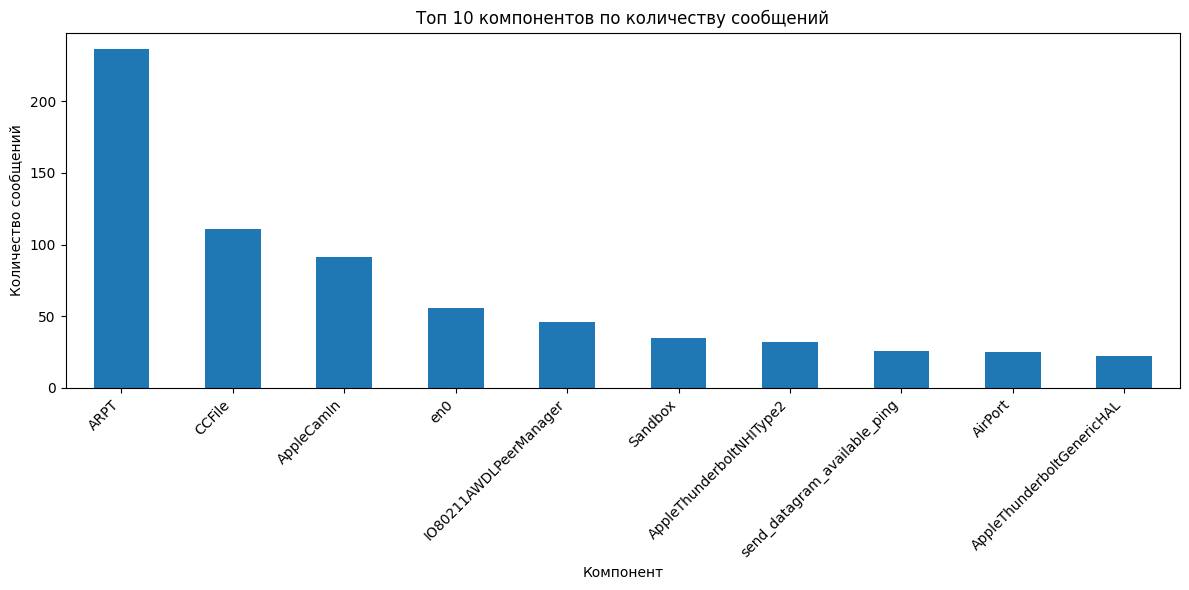

In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Подключение к базе данных и загрузка данных:
conn = sqlite3.connect('/content/db/log-MAC-analysis.db')
df = pd.read_sql_query("SELECT * FROM logs_parsed", conn)
# Преобразование столбца Datetime в тип datetime:
df['Datetime'] = pd.to_datetime(df['Datetime'])
# 1. Анализ по компонентам:
component_counts = df['Parsed_Component'].value_counts()
print("Топ 10 компонентов по количеству сообщений:")
print(component_counts.head(10))
# Визуализация топ 10 компонентов:
plt.figure(figsize=(12, 6))
component_counts.head(10).plot(kind='bar')
plt.title('Топ 10 компонентов по количеству сообщений')
plt.xlabel('Компонент')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_components.png')
plt.show()
plt.close()

### **7.2 Перейдем к анализу по времени:**

Распределение сообщений по часам:
Hour
0      64
1      42
2      58
3      62
4      59
5      46
6      49
7      58
8      39
9     126
10     95
11    119
12    125
13    117
14     82
15     61
16    148
17     70
18    111
19     86
20     74
21     67
22     46
23    133
Name: count, dtype: int64


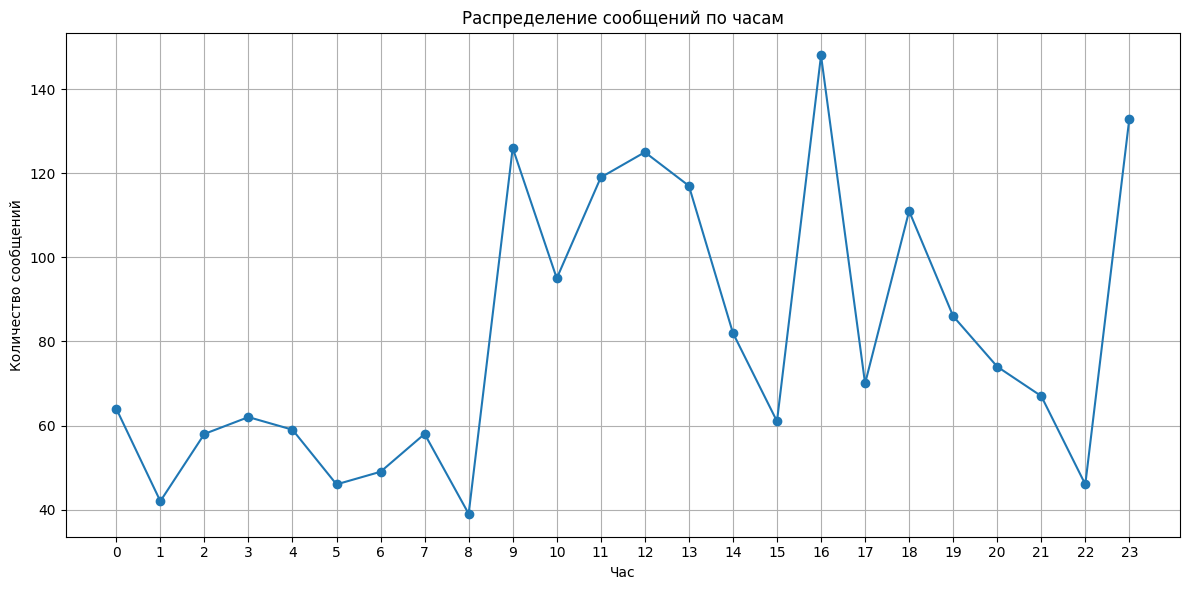

In [34]:
# 2. Анализ по времени:
df['Hour'] = df['Datetime'].dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()
print("Распределение сообщений по часам:")
print(hourly_counts)
# Визуализация распределения по часам:
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line', marker='o')
plt.title('Распределение сообщений по часам')
plt.xlabel('Час')
plt.ylabel('Количество сообщений')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.savefig('hourly_distribution.png')
plt.show()
plt.close()

### **7.3 Отобразим анализ по пользователям:**

Топ 5 пользователей по количеству сообщений:
User
authorMacBook-Pro            543
calvisitor-10-105-162-105    331
calvisitor-10-105-162-178    244
calvisitor-10-105-160-95     136
calvisitor-10-105-163-202    131
Name: count, dtype: int64


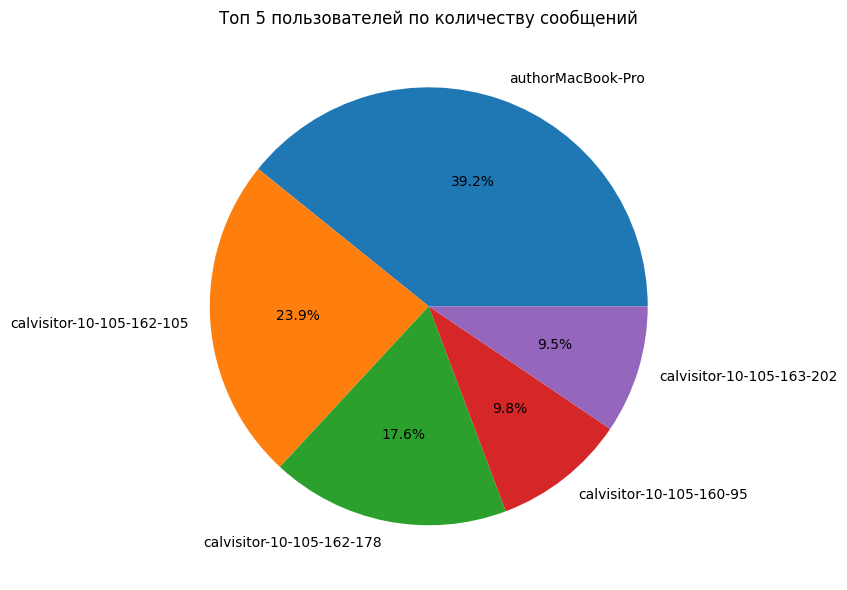

In [35]:
# 3. Анализ по пользователям:
user_counts = df['User'].value_counts()
print("Топ 5 пользователей по количеству сообщений:")
print(user_counts.head())
# Визуализация топ 5 пользователей:
plt.figure(figsize=(10, 6))
user_counts.head().plot(kind='pie', autopct='%1.1f%%')
plt.title('Топ 5 пользователей по количеству сообщений')
plt.ylabel('')
plt.tight_layout()
plt.savefig('top_5_users.png')
plt.show()
plt.close()


### **7.4 Сохраним полученные графики в файлы с расширением .png и закроем соединение с БД:**

In [37]:
print("Графики сохранены в файлы: top_10_components.png, hourly_distribution.png, top_5_users.png")
# Закрытие соединения с базой данных
conn.close()

Графики сохранены в файлы: top_10_components.png, hourly_distribution.png, top_5_users.png
